In [43]:
# Import necessary libraries


import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score
from tensorflow.keras.layers import Dropout

data = pd.read_csv('../Feature Engineering/data_post_pca.csv')
print(data.shape)
data=data.dropna()
X_pca = data.drop('label', axis=1)
# X_pca=data.drop('')
y = data['label']



# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



import pandas as pd
from sklearn.utils import resample
%run '../Feature Engineering/Sampling.ipynb'
df_train=X_train
df_train['label']=y_train
df_train=upsample(df_train)
# print(df_train.shape)
X_train=df_train.drop('label',axis=1)
y_train=df_train['label']



# Define the ANN model architecture
# model = Sequential()
# model.add(Dense(64, input_dim=X_train.shape[-1], activation='relu'))
# model.add(Dense(128, activation='relu'))
# # model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[-1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))



# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))



# print(f"Accuracy: {accuracy}")
y_pred = model.predict(X_test)


(23642, 21)
Epoch 1/20
783/783 [==============================] - 1s 801us/step - loss: 0.5288 - accuracy: 0.7245 - val_loss: 0.4426 - val_accuracy: 0.6868
Epoch 2/20
783/783 [==============================] - 1s 716us/step - loss: 0.3714 - accuracy: 0.8288 - val_loss: 0.2796 - val_accuracy: 0.7951
Epoch 3/20
783/783 [==============================] - 1s 710us/step - loss: 0.2700 - accuracy: 0.8673 - val_loss: 0.2370 - val_accuracy: 0.8010
Epoch 4/20
783/783 [==============================] - 1s 717us/step - loss: 0.2381 - accuracy: 0.8773 - val_loss: 0.2160 - val_accuracy: 0.8110
Epoch 5/20
783/783 [==============================] - 1s 713us/step - loss: 0.2224 - accuracy: 0.8811 - val_loss: 0.1897 - val_accuracy: 0.8213
Epoch 6/20
783/783 [==============================] - 1s 715us/step - loss: 0.2149 - accuracy: 0.8907 - val_loss: 0.1804 - val_accuracy: 0.9072
Epoch 7/20
783/783 [==============================] - 1s 710us/step - loss: 0.2020 - accuracy: 0.9079 - val_loss: 0.1693 - v

Accuracy: 0.9399450200888138
Precision: 0.9806678383128296
Recall: 0.6714801444043321
F1 Score: 0.7971428571428572
Confusion Matrix [[3887   11]
 [ 273  558]]


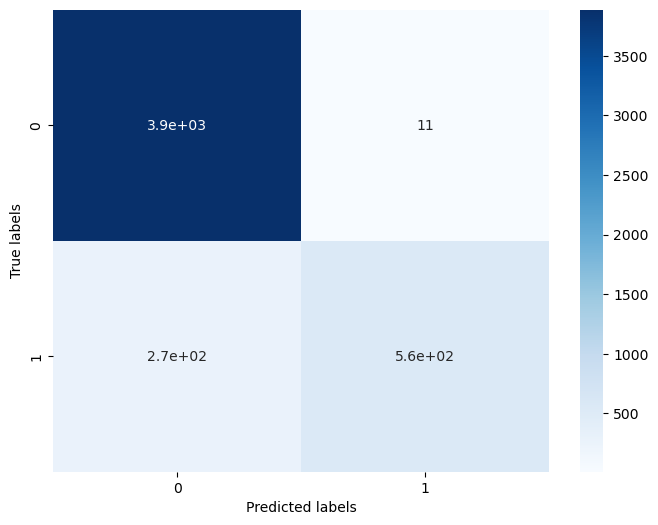

In [44]:


y_pred = [1 if x > 0.5 else 0 for x in y_pred]
%run performance.ipynb

performance_scores(y_pred,y_test)


In [45]:
# Get the embedding of the last layer (penultimate layer)
embedding_layer_model = keras.Model(inputs=model.input, outputs=model.layers[-2].output)
embedding = embedding_layer_model.predict(X_train)



783/783 [==============================] - 0s 299us/step


In [46]:
# # Finding best hyperparameters
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# k_values = np.arange(1, 20)
# distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
# best_accuracy = 0
# best_params = {}
# for k in k_values:
#     for metric in distance_metrics:
#         knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
#         knn.fit(embedding, y_train)
#         y_pred = knn.predict(embedding_test)
#         accuracy = evaluate_accuracy(y_test, y_pred)
#         print(y_test.shape,y_pred.shape)
#         recall = recall_score(y_test, y_pred, average='binary')
#         precision = precision_score(y_test, y_pred, average='binary')
#         print(f"Run {k} using {metric}: Accuracy--->{accuracy} Precision:{precision} Recall:{recall}")
#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_params = {'k': k, 'metric': metric}
# print(f"Best accuracy: {best_accuracy}")
# print(f"Best params: {best_params}")

In [47]:
# Use the embedding to feed into KNN
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(embedding, y_train)
embedding_test = embedding_layer_model.predict(X_test)
y_pred=knn.predict(embedding_test)

148/148 [==============================] - 0s 282us/step


/Users/pratikjadhav/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9503066187354621
Precision: 0.8514150943396226
Recall: 0.8688327316486161
F1 Score: 0.860035735556879
Confusion Matrix [[3772  126]
 [ 109  722]]


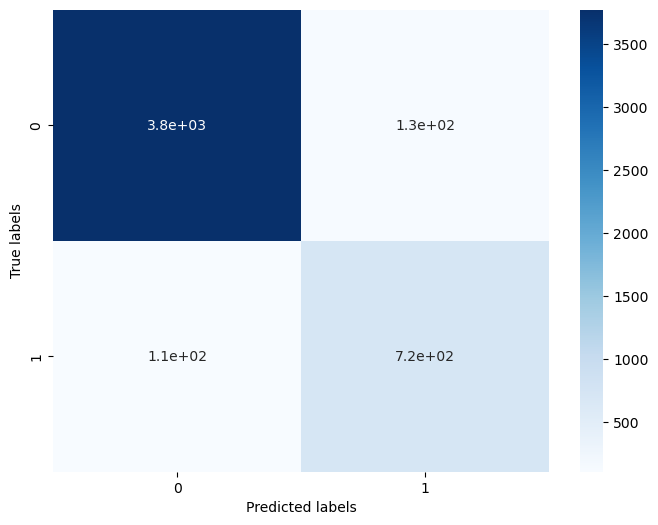

In [48]:
%run performance.ipynb

performance_scores(y_pred,y_test)